In [8]:
from __future__ import annotations

import numpy as np
import pandas as pd

import scanpy as sc
import anndata as ad
# import decoupler
import seaborn.objects as so

import session_info

In [9]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [16]:
adata = sc.read(
    "kang_counts_25k.h5ad", backup_url="https://figshare.com/ndownloader/files/34464122"
)
adata

/home/aesteban/TFM/robustness_informed_TFM/.pixi/envs/default/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'label', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [17]:
adata

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'label', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [18]:
# Storing the counts for later use
adata.layers["counts"] = adata.X.copy()
# Renaming label to condition
adata.obs = adata.obs.rename({"label": "condition"}, axis=1)

# Normalizing
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [19]:
# Finding highly variable genes using count data
sc.pp.highly_variable_genes(
    adata, n_top_genes=4000, flavor="seurat_v3", subset=False, layer="counts"
)

In [20]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [21]:
adata

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'condition', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [29]:
adata.obs["condition"] = adata.obs["condition"].str.replace("ctrl","control").str.replace("stim","stimulated")

In [37]:
adata.obs.rename(columns = {"condition":"Estado","cell_type":"Tipo de célula"},inplace=True)
adata.obs["Estado"] = adata.obs["Estado"].str.replace("stimulated","estimulada")

/home/aesteban/TFM/robustness_informed_TFM/.pixi/envs/default/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/aesteban/TFM/robustness_informed_TFM/.pixi/envs/default/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/aesteban/TFM/robustness_informed_TFM/.pixi/envs/default/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the 

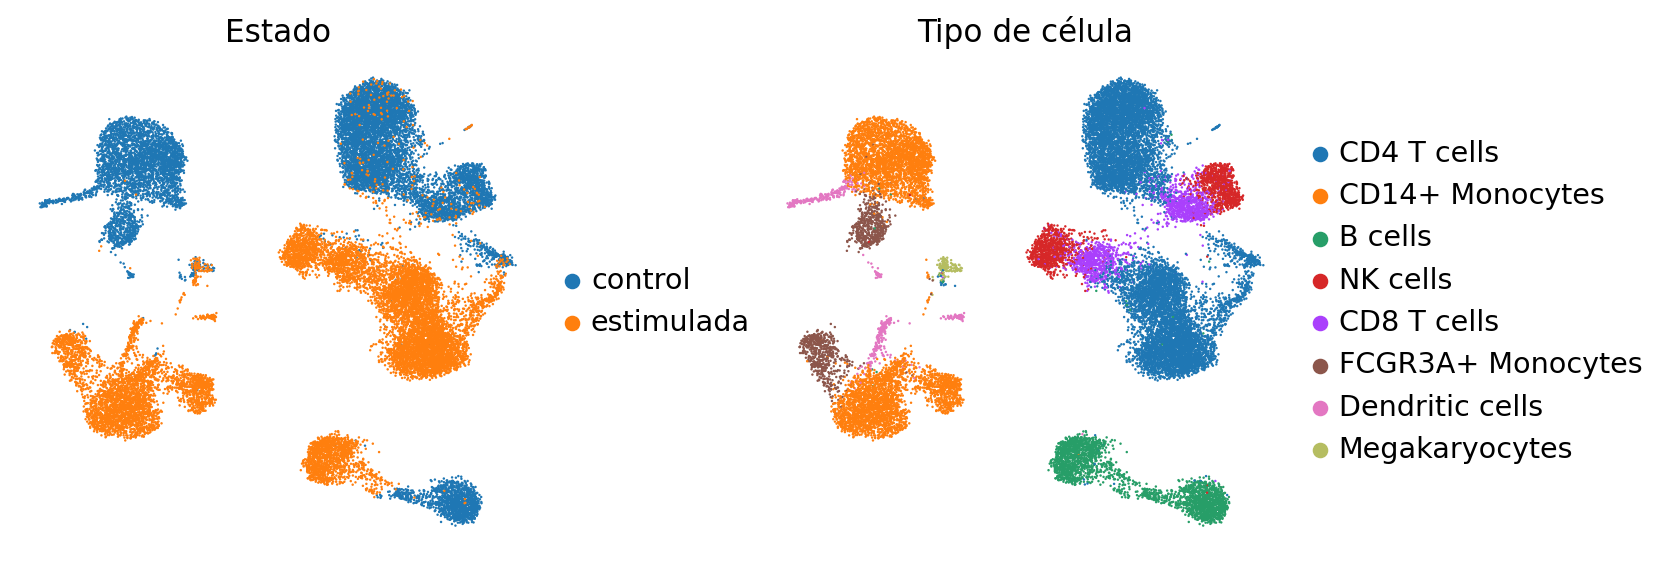

In [38]:
import matplotlib.pyplot as plt
sc.pl.umap(
    adata,
    color=["Estado", "Tipo de célula"],
    frameon=False,
    ncols=2,
        wspace=0.3,
    show=False,
)
plt.savefig("/home/aesteban/TFM/robustness_informed_TFM/results/figs/kang_umap.pdf", bbox_inches="tight",dpi=300)
plt.savefig("/home/aesteban/TFM/robustness_informed_TFM/results/figs/kang_umap.png",dpi=300)